**TO DO**:

**Determine what is the criteria to consider or ignore one session**, so we can incorporate the concept in different analyses, such as:

- **Overlap** (used apps, time, pageviews, ...)
- **User journeys** (time in app, time session, number of apps)

 

The purpose is to "clean" the data in a **non-destructive** way to allow for better analyses of user journeys.

Can be linked to the time spent, or to the number of systems used. Need to consider journeys over idsites 9 and 14.

Probably will require a decision on the number of sessions to be declared as "valid" as the different parameters for consideration are changed. Maybe a "what if" chart that shows how many sessions would be ignored if the time spent is 10, 20, 30 seconds, for example.

 
Deliverable:

Instructions (with a query) for Damir to implement a flag in the fact_session table to indicate if the session should be considered or not.

Atcions keys:

- action-1 = view
- action-2 = context/view
- action-0 = out/change
- action-6 = click
- action-7 = menu
- action-5 = click
- action-4 = click
- action-3 = click


In [1]:
import pandas as pd
from matplotlib.ticker import StrMethodFormatter
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("vaishali_cleaned_data_sep20.csv")

In [3]:
df['appname_c'] = 'app-' + df['appname_c'].astype('str')
df['event_action_c'] = 'action-' + df['event_action_c'].astype('str')

In [4]:
df.head()

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning
0,0,2020-09-21 12:25:57.000,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1
1,1,2020-09-21 12:26:07.000,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,1,0,1
2,2,2020-09-21 12:26:09.000,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,2,0,1
3,3,2020-09-21 12:27:23.000,77997,action-1,app-11,0,74,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,3,0,1
4,4,2020-09-21 12:27:25.000,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,4,0,1


In [5]:
df.server_time = pd. to_datetime(df.server_time) 
df['elapsedtime'] = df.groupby("session_hk_c").server_time.diff().dt.seconds.fillna(0)
#df

In [6]:
#df

In [7]:
#df['session_hk_c']='app-10'

In [8]:
#df
#df['appname_c'].values

In [9]:
#df.groupby('session_hk_c') 
#data=df.loc[df['appname_c'] == 'app-10']
#data.loc[df['elapsedtime'] >= 5.0 ]


In [10]:
#df.groupby('session_hk_c') 
#df.groupby(df['session_hk_c']==323384) 

#data=df.loc[df['appname_c'] ==  df['appname_c'].values]
#data.loc[df['elapsedtime'] >= 5.0 ]
#data.groupby(df['session_hk_c']==0) 

In [11]:
#df[df['elapsedtime'] > 5.0].groupby(['session_hk_c'])
 

In [12]:
#df['apps_all']=df.groupby('session_hk_c')['appname_c'].transform(lambda x: ','.join(x))
#df.groupby('session_hk_c')['appname_c'].transform(lambda x: ','.join(x))
#df

In [13]:
#df.loc[df['appname_c'] == 'app-10']

In [14]:
#df.loc[df['elapsedtime'] >= 5.0 ]

In [15]:
#dg=df[~df.appname_c.duplicated()].groupby('session_hk_c')['appname_c']

In [16]:
#dg keep='last'
#d1=df.drop_duplicates(subset='session_hk_c', keep="first")
#d1

In [17]:
#df.groupby('session_hk_c')['appname_c'].duplicated()
#df1=df[~df.session_hk_c.duplicated(keep='first')]   

In [18]:
#jk=df[~df.appname_c.duplicated()]
#df1

In [19]:
#jk.loc[df['appname_c'] == 'app-11']

In [549]:
#df.loc[df['session_hk_c'] == 1]

In [550]:
#jk=df[~df.session_hk_c.duplicated()]                          

In [551]:
#jk

In [552]:
 #df[~df.appname_c.duplicated()] 
#jk.loc[df['appname_c'] == 'app-31']

In [553]:
#jk['action_all']=jk.groupby('session_hk_c')['event_action_c'].transform(lambda x: ','.join(x))
#jk

In [554]:
#jk['app_all']=jk.groupby('session_hk_c')['appname_c'].transform(lambda x: ','.join(x))
#jk

In [555]:
#df.loc[df['appname_c'] == 'app-10']

In [556]:
#df.loc[df['event_action_c'] == 'action-1']

In [557]:
#d=df.loc[df['event_action_c'] == 'action-1']

In [558]:
#d.loc[df['appname_c'] == 'app-10']

In [559]:
#d2=df.drop_duplicates(subset='event_action_c', keep="first")
#d2

There are different events with the same apps, we can write a function to mentain only one event with that respective event. It can be performed as follows:

In [20]:
dfn= df.loc[df['appname_c'] != df['appname_c'].shift()]

In [21]:
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0
79,79,2020-09-21 13:11:36,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,79,0,1,2.0
81,81,2020-09-23 13:27:55,4671,action-1,app-31,1,0,12,11,2020-09-23 13:27:55.000,2020-09-23 13:28:06.000,0,0,1,0.0
83,83,2020-09-02 05:45:37,342716,action-1,app-11,2,0,55,54,2020-09-02 05:45:37.000,2020-09-02 05:46:31.000,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594328,3594328,2020-09-18 12:57:57,48524,action-1,app-38,488024,0,48,18,2020-09-18 12:57:57.000,2020-09-18 12:58:15.000,0,0,1,0.0
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0
3594332,3594332,2020-09-06 20:32:57,192956,action-1,app-61,488027,0,3,2,2020-09-06 20:32:57.000,2020-09-06 20:32:59.000,0,0,0,0.0


Mentaining events which lasts for more than five seconds.

In [22]:
#c

Histogram to see a sessions that has 1 sec, 2 sec, ....

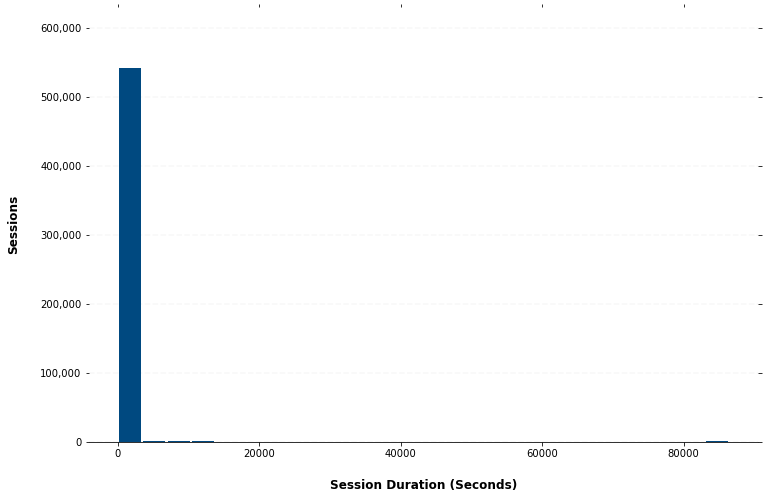

In [563]:
ax = dfn.hist(column='elapsedtime', bins=25, grid=False, figsize=(12,8), color='#004980', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [564]:
""""ax = dfn[dfn['session_duration'] <= 5.0].hist(column='session_duration', bins=25, grid=False, figsize=(12,8), color='#004980', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))"""

'"ax = dfn[dfn[\'session_duration\'] <= 5.0].hist(column=\'session_duration\', bins=25, grid=False, figsize=(12,8), color=\'#004980\', zorder=2, rwidth=0.9)\n\nax = ax[0]\nfor x in ax:\n\n    # Despine\n    x.spines[\'right\'].set_visible(False)\n    x.spines[\'top\'].set_visible(False)\n    x.spines[\'left\'].set_visible(False)\n\n    # Switch off ticks\n    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")\n\n    # Draw horizontal axis lines\n    vals = x.get_yticks()\n    for tick in vals:\n        x.axhline(y=tick, linestyle=\'dashed\', alpha=0.4, color=\'#eeeeee\', zorder=1)\n\n    # Remove title\n    x.set_title("")\n\n    # Set x-axis label\n    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight=\'bold\', size=12)\n\n    # Set y-axis label\n    x.set_ylabel("Sessions", labelpad=20, weight=\'bold\', size=12)\n\n    # Format y-axis label\n    x.yaxis.set_major_formatter(StrMethodFormatter(\'{x:,

In [565]:
 #df.hist(column='session_duration>=5.0')
#df[df['session_duration'] == 5.0].hist(bins=100)
#plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD25B03430>]],
      dtype=object)

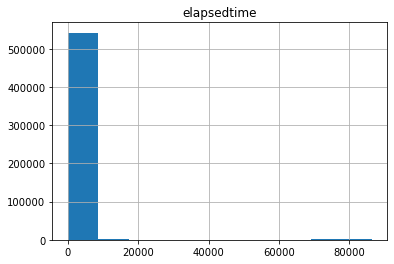

In [566]:
dfn.hist(column='elapsedtime')

According to plot, there is 525000 total sessions and sessions durations till 90000sec.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD27289D00>]],
      dtype=object)

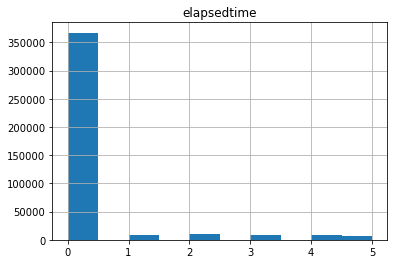

In [567]:
dfn[dfn['elapsedtime'] <= 5.0].hist(column='elapsedtime')

above plot shows a number of sessions with  time less than 5 seconds. From the plot we can say, for the 0 seconds of elapsed time, we have 375000 sessions. for the 1 sec and 3 sec of elapsed time,  we have total 10000 sessions. For the elapsed time of 2  sec, there are 12000 sessions. And for elapsed time between 4 and 5, there is sessions between 12000 and 10000. Maximum number of sessions in this case is 375000.

In [568]:
#dfn[dfn['session_duration'] <= 14.0].hist(column='session_duration')

In [569]:
#dfn[dfn['session_duration'] >= 5.0].hist(column='session_duration')

In [570]:
#dfn[dfn['elapsedtime'] == 0].hist(column='session_duration')

In [571]:
#dfn[dfn['session_duration'] == 1.0].hist(column='session_duration')

In [572]:
#dfn=dfn.loc[dfn['elapsedtime'] >= 5.0 ]

In [573]:
#columns_of_interest = ['session_hk_c','visitor_id_c', 'appname_c']
#two_columns_of_data = df[columns_of_interest]

Filtered is apply for dispalying data which lasts for elapsed time of greater than 5 seconds.

In [23]:
#two_columns_of_data 
dfnn=dfn.loc[dfn['elapsedtime'] >= 5.0 ]
dfnn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0
196,196,2020-09-16 09:04:38,270811,action-1,app-11,25,0,766,596,2020-09-16 09:04:38.000,2020-09-16 09:14:34.000,1,0,1,85.0
239,239,2020-09-21 00:11:02,185038,action-0,app-48,34,0,0,0,2020-09-21 00:11:02.000,2020-09-21 00:11:02.000,2,1,1,9.0
241,241,2020-09-21 00:11:07,185038,action-1,app-48,34,0,3,2,2020-09-21 00:11:07.000,2020-09-21 00:11:09.000,4,1,1,5.0
275,275,2020-09-21 00:48:15,185038,action-1,app-55,34,0,0,0,2020-09-21 00:48:15.000,2020-09-21 00:48:15.000,38,0,1,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593917,3593917,2020-09-03 13:18:38,254289,action-1,app-61,487993,166,1437,1436,2020-09-03 12:55:46.000,2020-09-03 13:19:42.000,6,0,1,166.0
3593929,3593929,2020-09-30 05:25:17,48864,action-0,app-59,487999,5,106,53,2020-09-30 05:24:33.000,2020-09-30 05:25:26.000,1,0,0,44.0
3593930,3593930,2020-09-30 05:25:25,48864,action-1,app-61,487999,8,106,53,2020-09-30 05:24:33.000,2020-09-30 05:25:26.000,2,0,0,8.0
3593940,3593940,2020-09-23 19:45:20,309779,action-1,app-38,488003,0,201,167,2020-09-23 19:45:20.000,2020-09-23 19:48:07.000,1,0,1,27.0


The apps used by sessions that we eiminate is as follows:

In [575]:
dfnew =dfn.loc[dfn['elapsedtime'] <= 5.0 ]
#dfnew.loc[:, ['appname_c', 'session_hk_c', 'session_duration']]
dfnew.loc[:, ['appname_c', 'session_hk_c',  'elapsedtime']]

,appname_c,session_hk_c,elapsedtime
0,app-11,0,0.0
79,app-11,0,2.0
81,app-31,1,0.0
83,app-11,2,0.0
85,app-61,3,0.0
...,...,...,...
3594328,app-38,488024,0.0
3594330,app-61,488025,0.0
3594331,app-11,488026,0.0
3594332,app-61,488027,0.0


In [576]:
#df

In [577]:
#x = dfnn.groupby([  'session_hk_c','visitor_id_c'])['time_spent_ref_action'].sum()

In [578]:
#x

In [579]:
#x.visitor_id_c

Average number of times the apps is used by user in a session.

In [24]:
#x=dfn.groupby(['session_hk_c'])['time_spent_ref_action'].sum()
#x= dfnn.groupby([  'session_hk_c','visitor_id_c']).agg({'time_spent_ref_action': 'sum'})
x=dfn.groupby(['session_hk_c','visitor_id_c'])['appname_c'].transform('count') 
y=dfn.groupby(['visitor_id_c'])['appname_c'].count()
#dfn['AvgTimen1']=(dfn.groupby(['session_hk_c'])['time_spent_ref_action'].sum())/(dfn.groupby(['session_hk_c'])['session_hk_c'].count()).replace(np.nan, 0)
#dfn['AvgTimen']=(dfn.groupby(['session_hk_c','visitor_id_c'])['time_spent_ref_action'].sum())/(dfn.groupby(['session_hk_c'])['session_hk_c'].count()).replace(np.nan, 0)
dfn['AvgAppused']=x/y
dfn=dfn.fillna(0)
dfn

<ipython-input-24-5b61391c109f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['AvgAppused']=x/y


,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0,1.5
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0,1.0
79,79,2020-09-21 13:11:36,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,79,0,1,2.0,3.0
81,81,2020-09-23 13:27:55,4671,action-1,app-31,1,0,12,11,2020-09-23 13:27:55.000,2020-09-23 13:28:06.000,0,0,1,0.0,0.0
83,83,2020-09-02 05:45:37,342716,action-1,app-11,2,0,55,54,2020-09-02 05:45:37.000,2020-09-02 05:46:31.000,0,0,1,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594328,3594328,2020-09-18 12:57:57,48524,action-1,app-38,488024,0,48,18,2020-09-18 12:57:57.000,2020-09-18 12:58:15.000,0,0,1,0.0,0.0
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0
3594332,3594332,2020-09-06 20:32:57,192956,action-1,app-61,488027,0,3,2,2020-09-06 20:32:57.000,2020-09-06 20:32:59.000,0,0,0,0.0,0.0


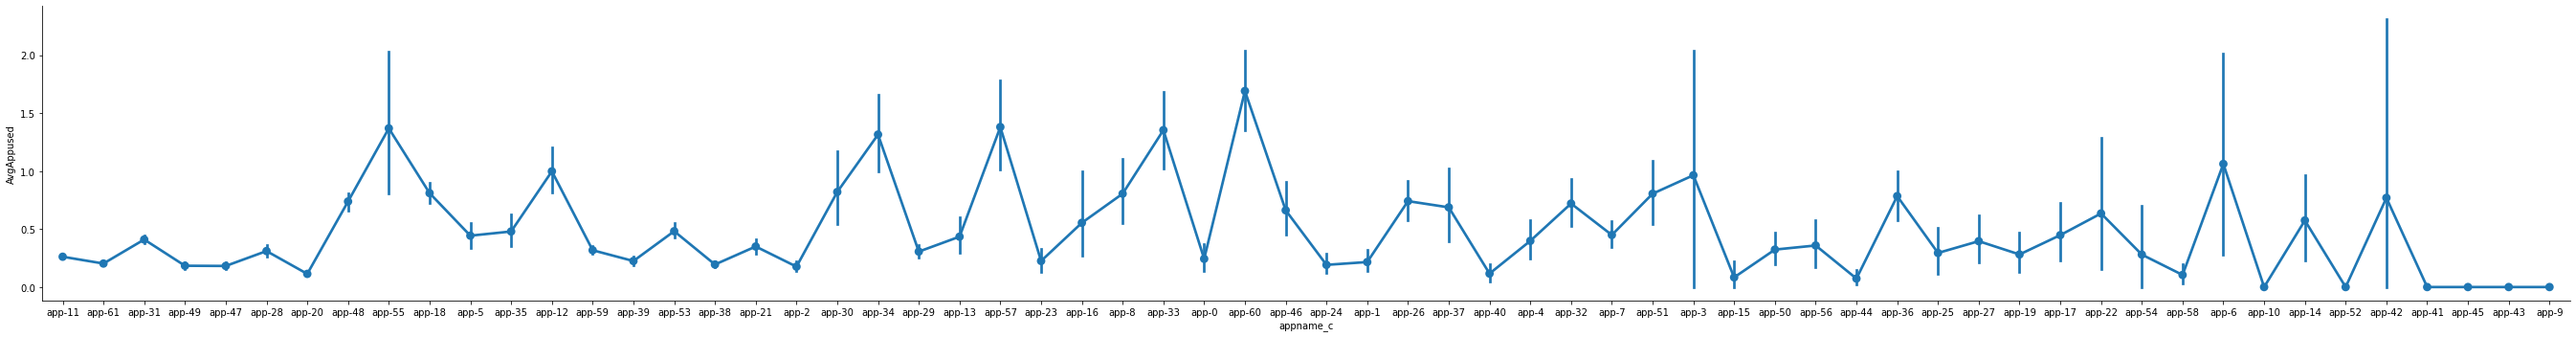

In [25]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='AvgAppused',
                data=dfn,
                kind='point', height=5,
                aspect=7.5)

Percentage from average number of times app used over sessions :-

In [26]:
#appstatev = dfn.groupby(['visitor_id_c']).agg({'appname_c': 'count'})

#dfna = dfn.groupby([ 'visitor_id_c', 'session_hk_c']).agg({'appname_c': 'count'})
#dfna
#c = dfn.groupby(['session_hk_c']).agg({'appname_c': 'count'})
#c

In [27]:
#dfnew3 = dfnn.groupby(['appname_c', 'session_hk_c']).agg({'visit_total_time': 'sum'})
dfnaa = dfn.groupby([ 'visitor_id_c', 'session_hk_c']).agg({'appname_c': 'count'})
#dfnew3 = dfnn.groupby([ 'visitor_id_c','session_hk_c' ]).agg({'visit_total_time': 'sum'})

#appstatev = dfn.groupby(['session_hk_c']).agg({'appname_c': 'count'})
appstatev = dfn['appname_c'].count() 
#dfn['AvgAppusedPer']=dfn.div(appstatev, level='visitor_id_c') * 100
#dfnaa['AvgAppusedPer']=dfnaa.div(appstatev, level='session_hk_c')   
dfnaa['AvgAppusedPer']=dfnaa.div(appstatev, level='session_hk_c')  * 100 
dfnaa

,,appname_c,AvgAppusedPer
visitor_id_c,session_hk_c,,
0,35585,2,0.000366
1,99804,1,0.000183
2,75342,1,0.000183
4,48479,1,0.000183
5,260557,1,0.000183
...,...,...,...
355895,59280,5,0.000915
355896,203122,1,0.000183
355898,415706,1,0.000183


In [603]:
#x=dfn.groupby(['session_hk_c'])['time_spent_ref_action'].sum()
#x= dfnn.groupby([  'session_hk_c','visitor_id_c']).agg({'time_spent_ref_action': 'sum'})
#x=dfn.groupby(['session_hk_c','visitor_id_c'])['time_spent_ref_action'].transform('sum') 
#y=dfn.groupby(['session_hk_c'])['time_spent_ref_action'].sum()
#dfn['AvgTimen1']=(dfn.groupby(['session_hk_c'])['time_spent_ref_action'].sum())/(dfn.groupby(['session_hk_c'])['session_hk_c'].count()).replace(np.nan, 0)
#dfn['AvgTimen']=(dfn.groupby(['session_hk_c','visitor_id_c'])['time_spent_ref_action'].sum())/(dfn.groupby(['session_hk_c'])['session_hk_c'].count()).replace(np.nan, 0)
#dfn['AvgTimeused']=x/y
#dfn=dfn.fillna(0)
#dfn

In [604]:
#Average time of each application used in a session. From the total time of each application, percentage over session is:-
#dfnew2 = dfnn.groupby([  'session_hk_c','visitor_id_c']).agg({'time_spent_ref_action': 'sum'})
#dfnew2 = dfnn.groupby([   'visitor_id_c']).agg({'time_spent_ref_action': 'sum'})
#appstate = dfnn.groupby(['session_hk_c']).agg({'time_spent_ref_action': 'sum'})
#appstate = dfnn.groupby(['session_hk_c']).agg({'session_hk_c': 'count'})
#dfnew2['percentage']=dfnew2.div(appstate, level='session_hk_c') * 100
#dfnew2.fillna(0)

In [605]:
#dfnew2.plot(kind="bar")

In [606]:
#dfnew2.percentage

In [607]:
#dfnew2.set_index('percentage').T.plot(kind='bar', stacked=True)

In [608]:
#dfnew2.plot(kind='bar', x='visitor_id_c', y='percentage')

Average time of each application used in a session.  

In [609]:
#dfn

In [37]:
#dfnn['AvgTimeapp']=(dfnn.groupby(['visitor_id_c'])['visit_total_time'].sum())/(dfnn.groupby(['visitor_id_c'])['appname_c'].count()).replace(np.nan, 0)
dfnn['AvgTimeapp']=(dfnn.groupby(['visitor_id_c'])['visit_total_time'].sum())/(dfnn.groupby(['visitor_id_c'])['appname_c'].count())
dfnn=dfnn.fillna(0)
dfnn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgTimeapp
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0,1912.0
196,196,2020-09-16 09:04:38,270811,action-1,app-11,25,0,766,596,2020-09-16 09:04:38.000,2020-09-16 09:14:34.000,1,0,1,85.0,0.0
239,239,2020-09-21 00:11:02,185038,action-0,app-48,34,0,0,0,2020-09-21 00:11:02.000,2020-09-21 00:11:02.000,2,1,1,9.0,0.0
241,241,2020-09-21 00:11:07,185038,action-1,app-48,34,0,3,2,2020-09-21 00:11:07.000,2020-09-21 00:11:09.000,4,1,1,5.0,0.0
275,275,2020-09-21 00:48:15,185038,action-1,app-55,34,0,0,0,2020-09-21 00:48:15.000,2020-09-21 00:48:15.000,38,0,1,116.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593917,3593917,2020-09-03 13:18:38,254289,action-1,app-61,487993,166,1437,1436,2020-09-03 12:55:46.000,2020-09-03 13:19:42.000,6,0,1,166.0,0.0
3593929,3593929,2020-09-30 05:25:17,48864,action-0,app-59,487999,5,106,53,2020-09-30 05:24:33.000,2020-09-30 05:25:26.000,1,0,0,44.0,0.0
3593930,3593930,2020-09-30 05:25:25,48864,action-1,app-61,487999,8,106,53,2020-09-30 05:24:33.000,2020-09-30 05:25:26.000,2,0,0,8.0,0.0
3593940,3593940,2020-09-23 19:45:20,309779,action-1,app-38,488003,0,201,167,2020-09-23 19:45:20.000,2020-09-23 19:48:07.000,1,0,1,27.0,0.0


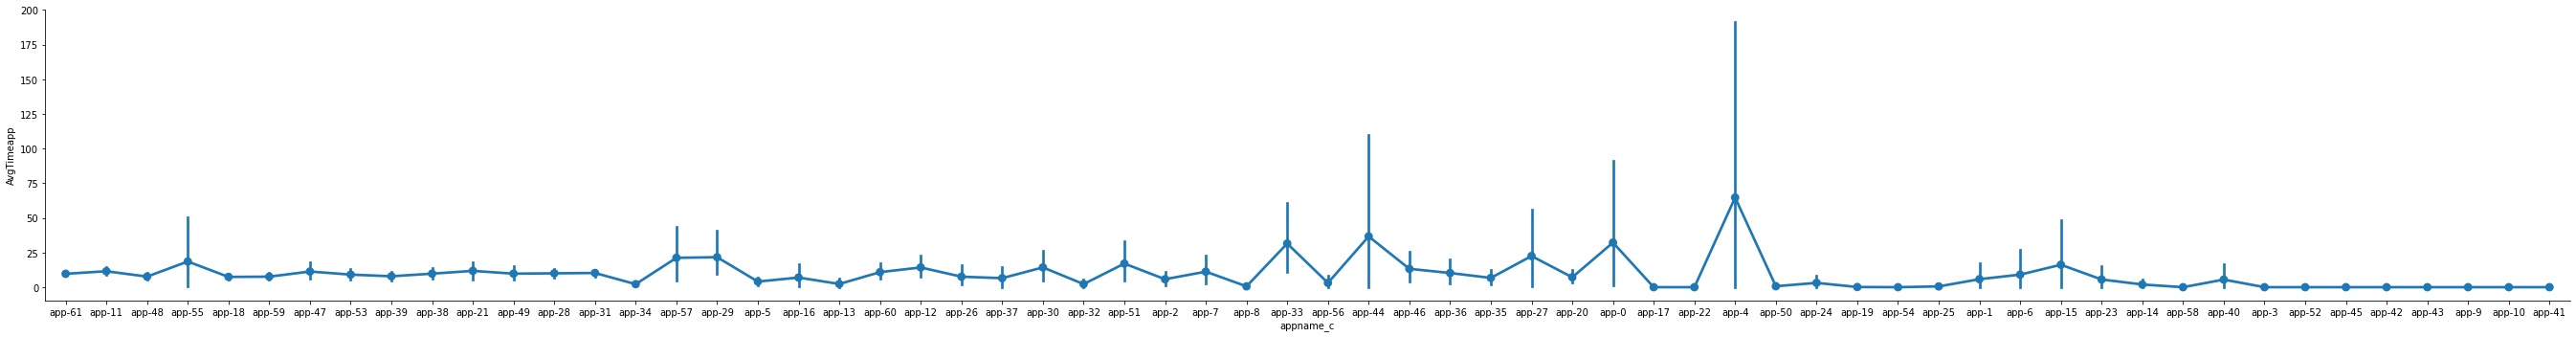

In [38]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='AvgTimeapp',
                data=dfnn,
                kind='point', height=5,
                aspect=7.5)

  From the total time of each application, percentage over session for similar apps is:-

In [612]:

#dfnew3 = dfnn.groupby(['appname_c', 'session_hk_c']).agg({'visit_total_time': 'sum'})
dfnew3 = dfnn.groupby(['appname_c','visitor_id_c', 'session_hk_c']).agg({'visit_total_time': 'sum'})
#dfnew3 = dfnn.groupby([ 'visitor_id_c','session_hk_c' ]).agg({'visit_total_time': 'sum'})
appstate = dfnn.groupby(['visitor_id_c']).agg({'visit_total_time': 'sum'})
dfnew3['percentage']=dfnew3.div(appstate, level='visitor_id_c') * 100
dfnew3

visit_total_time  percentage
appname_c visitor_id_c session_hk_c                              
app-0     2612         15096                       66  100.000000
          10253        312465                     793   31.656687
                       324755                     919   36.686627
          10256        17586                        1  100.000000
          10384        278747                     446   50.000000
...                                               ...         ...
app-8     350952       283853                      38   80.851064
          351449       11823                       81    1.800800
          351828       472970                       6  100.000000
          355333       160146                      12  100.000000
app-9     107385       232582                      23   20.000000

[98726 rows x 2 columns]

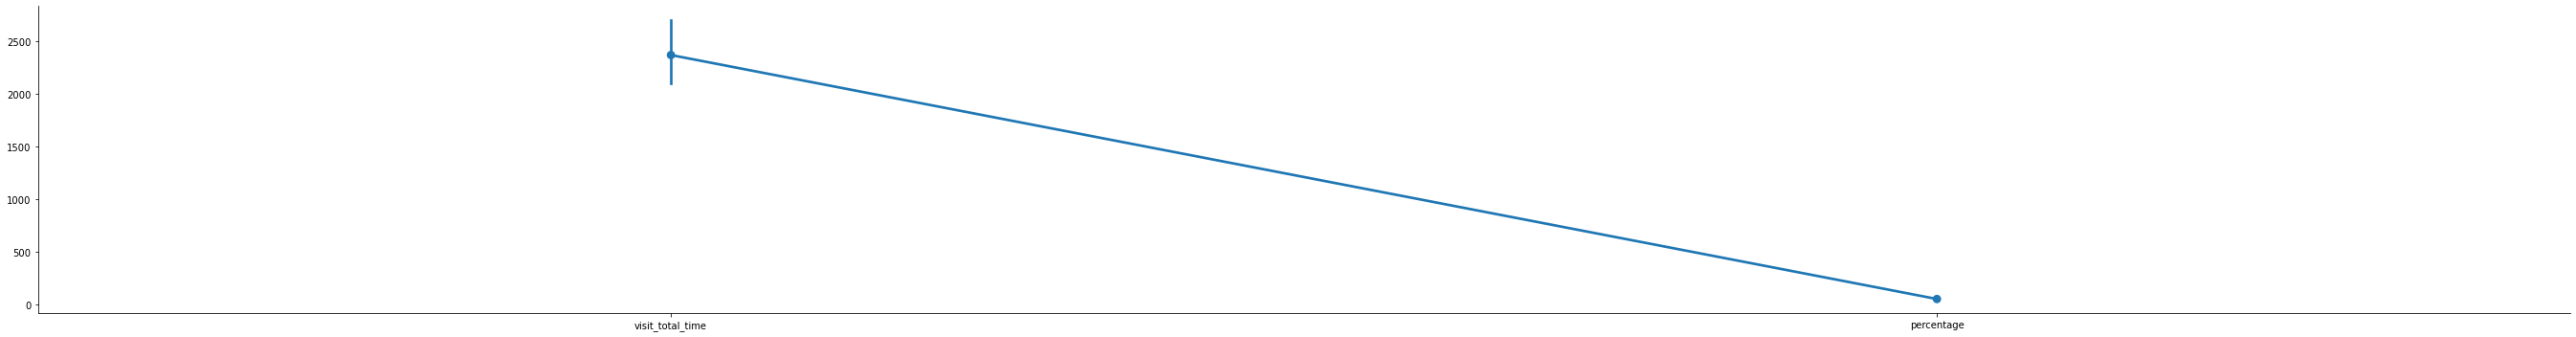

In [613]:
import seaborn as sns
c = sns.catplot(   
                data=dfnew3,
                kind='point', height=5,
                aspect=7.5)

From the total time of each application, percentage over session for all apps is:-

In [614]:
#dfnew3 = dfnn.groupby(['appname_c', 'session_hk_c']).agg({'visit_total_time': 'sum'})
dfnew4 = dfnn.groupby([ 'visitor_id_c', 'session_hk_c']).agg({'visit_total_time': 'sum'})
#dfnew3 = dfnn.groupby([ 'visitor_id_c','session_hk_c' ]).agg({'visit_total_time': 'sum'})
appstate = dfnn.groupby(['visitor_id_c']).agg({'visit_total_time': 'sum'})
dfnew4['percentage']=dfnew4.div(appstate, level='visitor_id_c') * 100
dfnew4

visit_total_time  percentage
visitor_id_c session_hk_c                              
6            152886                      87   18.589744
             474467                     381   81.410256
13           318779                     545  100.000000
23           330429                     253  100.000000
34           51500                       35   63.636364
...                                     ...         ...
355872       452955                      17  100.000000
355875       252826                     404  100.000000
355877       44548                       71  100.000000
355895       59280                     1362  100.000000
355900       188706                   15750  100.000000

[59615 rows x 2 columns]

Number of apps used in sessions and its percentage over sessions is :

In [615]:
#dfnew1['counta'] = dfnn.groupby('session_hk_c','visitor_id_c')['appname_c'].value_counts()
#dfnew1.rename(columns={'apps':'N'}, inplace=True)
#dfnew1['% of Total'] = dfnn.groupby('session_hk_c')['appname_c'].value_counts(normalize=True) * 100
#dfnew1['% of Total'] = dfnn.groupby('session_hk_c')['appname_c'].value_counts(normalize=True) * 100
#dfnew1

In [616]:
dfnew1['counta'] = pd.DataFrame(dfnn.groupby('session_hk_c')['appname_c'].value_counts())
#dfnew1.rename(columns={'apps':'N'}, inplace=True)
#dfnew1['% of Total'] = dfnn.groupby('session_hk_c')['appname_c'].value_counts(normalize=True) * 100
dfnew1['% of Total'] = dfnn.groupby('session_hk_c')['appname_c'].value_counts(normalize=True) * 100
dfnew1

appname_c  % of Total  counta
session_hk_c appname_c                               
0            app-61             1  100.000000       1
25           app-11             1  100.000000       1
34           app-48             4   66.666667       4
             app-18             1   16.666667       1
             app-55             1   16.666667       1
...                           ...         ...     ...
487993       app-61             1   50.000000       1
487999       app-59             1   50.000000       1
             app-61             1   50.000000       1
488003       app-38             1  100.000000       1
488019       app-38             1  100.000000       1

[98726 rows x 3 columns]

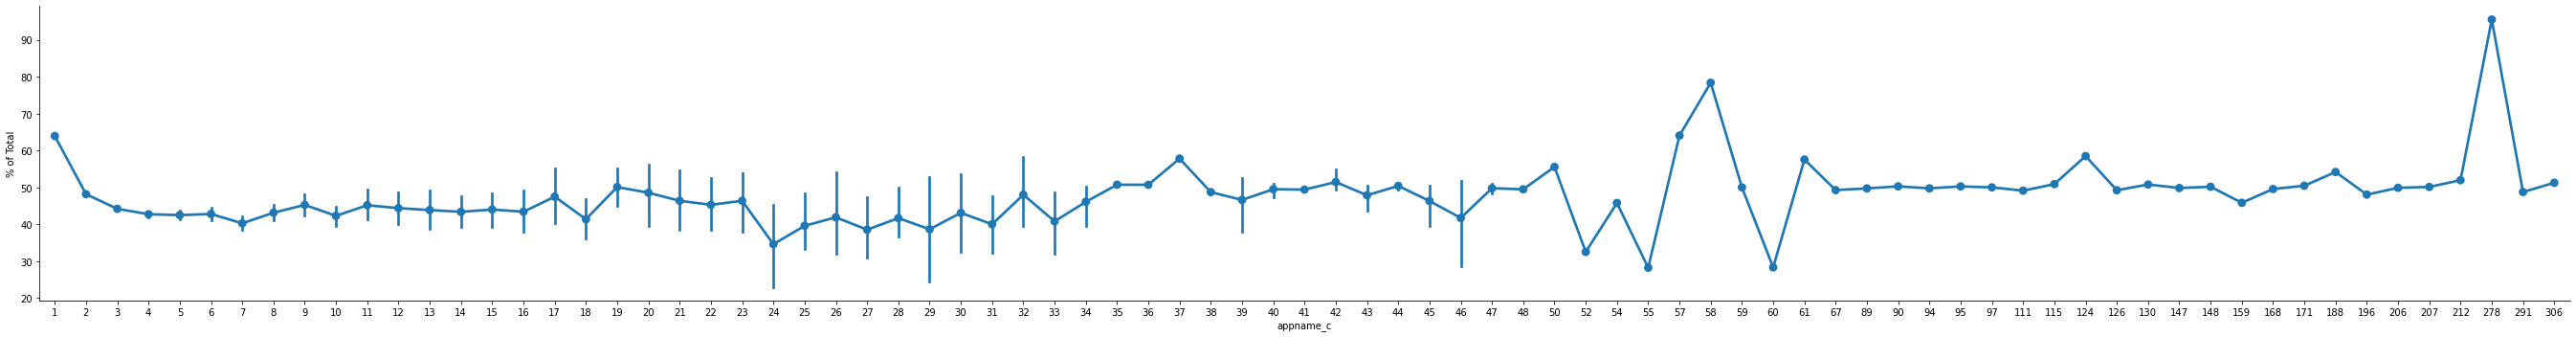

In [617]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='% of Total',
                data=dfnew1,
                kind='point', height=5,
                aspect=7.5)

In [618]:
#dfnew1['% of Total'].plot(kind="bar")

Filtering events with cases less than 3 events. Sometimes users just land accidentally in the website and
leave without visiting other pages. we can filter such events.

In [619]:
dfn=dfn.groupby([ 'visitor_id_c']).filter(lambda x: x['appname_c'].count() <= 3)

In [620]:
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused
87,87,2020-09-26 13:48:19,170701,action-1,app-11,4,0,0,0,2020-09-26 13:48:19.000,2020-09-26 13:48:19.000,0,0,0,0.0,0.0
88,88,2020-09-17 08:24:15,239772,action-1,app-61,5,0,2,1,2020-09-17 08:24:15.000,2020-09-17 08:24:16.000,0,0,0,0.0,0.5
89,89,2020-09-17 13:30:11,112074,action-1,app-11,6,0,31,29,2020-09-17 13:30:11.000,2020-09-17 13:30:40.000,0,0,1,0.0,0.0
91,91,2020-09-09 14:03:34,55267,action-1,app-61,7,0,1,0,2020-09-09 14:03:34.000,2020-09-09 14:03:34.000,0,0,1,0.0,0.0
92,92,2020-09-02 23:59:28,232021,action-1,app-11,8,3,5,3,2020-09-02 23:59:25.000,2020-09-02 23:59:28.000,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594322,3594322,2020-09-20 13:30:51,195856,action-1,app-61,488021,0,31,10,2020-09-20 13:30:51.000,2020-09-20 13:31:01.000,0,0,0,0.0,0.0
3594324,3594324,2020-09-30 13:26:20,307959,action-1,app-11,488023,0,52,50,2020-09-30 13:26:20.000,2020-09-30 13:27:10.000,0,0,1,0.0,0.0
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0


We can filter log by keeping those events whose total visit time is more than five seconds.

In [621]:
df=df.loc[df['visit_total_time'] >= 5.0 ]
#df=df.loc[df['time_spent_ref_action'] >= 5.0 ]

In [622]:
df

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0
1,1,2020-09-21 12:26:07,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,1,0,1,10.0
2,2,2020-09-21 12:26:09,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,2,0,1,2.0
3,3,2020-09-21 12:27:23,77997,action-1,app-11,0,74,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,3,0,1,74.0
4,4,2020-09-21 12:27:25,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,4,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594415,3594415,2020-09-12 15:50:48,144073,action-1,app-11,488031,45,10100,10098,2020-09-12 14:10:32.000,2020-09-12 16:58:50.000,69,0,1,46.0
3594416,3594416,2020-09-12 15:50:48,144073,action-1,app-11,488031,0,10100,10098,2020-09-12 14:10:32.000,2020-09-12 16:58:50.000,70,0,1,0.0
3594417,3594417,2020-09-12 15:50:53,144073,action-1,app-11,488031,5,10100,10098,2020-09-12 14:10:32.000,2020-09-12 16:58:50.000,71,0,1,5.0
3594418,3594418,2020-09-12 15:51:48,144073,action-1,app-11,488031,55,10100,10098,2020-09-12 14:10:32.000,2020-09-12 16:58:50.000,72,0,1,55.0


Events in which in each sessions same visitor uses same app multiple times in same perticular action, then we can keep only one event for it.

In [623]:
cols=['visitor_id_c', 'appname_c', 'event_action_c','session_hk_c']
dfn=dfn.loc[(dfn[cols].shift() != dfn[cols]).any(axis=1)]

In [624]:
#dfn

Sequential filter :-
-To identify visitors based on navigation and page view across site.
-To identify what visitor likes and what visitors avoid.

We can also count how many visitors uses two different apps in same session. we can also keep the events in which the app count is more than 1 in one perticular sessions.

In [625]:
dfn.groupby([ 'session_hk_c']).filter(lambda x: x['appname_c'].count() > 1)

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused
195,195,2020-09-16 09:03:13,270811,action-1,app-61,25,0,32,3,2020-09-16 09:03:13.000,2020-09-16 09:03:16.000,0,0,1,0.0,2.000000
196,196,2020-09-16 09:04:38,270811,action-1,app-11,25,0,766,596,2020-09-16 09:04:38.000,2020-09-16 09:14:34.000,1,0,1,85.0,0.666667
295,295,2020-09-21 13:02:15,93276,action-1,app-5,38,0,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,0,0,0,0.0,0.000000
296,296,2020-09-21 13:02:16,93276,action-1,app-31,38,1,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,1,0,0,1.0,0.000000
299,299,2020-09-21 13:02:23,93276,action-1,app-35,38,0,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,4,0,0,3.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593930,3593930,2020-09-30 05:25:25,48864,action-1,app-61,487999,8,106,53,2020-09-30 05:24:33.000,2020-09-30 05:25:26.000,2,0,0,8.0,0.000000
3594298,3594298,2020-09-16 18:36:31,61622,action-1,app-61,488012,0,4,3,2020-09-16 18:36:31.000,2020-09-16 18:36:34.000,0,0,0,0.0,0.000000
3594299,3594299,2020-09-16 18:36:34,61622,action-0,app-39,488012,2,4,3,2020-09-16 18:36:31.000,2020-09-16 18:36:34.000,1,0,0,3.0,0.000000
3594312,3594312,2020-09-02 04:09:55,141097,action-1,app-61,488019,0,377,351,2020-09-02 04:09:55.000,2020-09-02 04:15:46.000,0,0,1,0.0,0.000000


In [626]:
dfn.groupby([ 'visitor_id_c','event_action_c']).filter(lambda x: x['appname_c'].count() > 1)

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused
195,195,2020-09-16 09:03:13,270811,action-1,app-61,25,0,32,3,2020-09-16 09:03:13.000,2020-09-16 09:03:16.000,0,0,1,0.0,2.000000
196,196,2020-09-16 09:04:38,270811,action-1,app-11,25,0,766,596,2020-09-16 09:04:38.000,2020-09-16 09:14:34.000,1,0,1,85.0,0.666667
295,295,2020-09-21 13:02:15,93276,action-1,app-5,38,0,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,0,0,0,0.0,0.000000
296,296,2020-09-21 13:02:16,93276,action-1,app-31,38,1,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,1,0,0,1.0,0.000000
299,299,2020-09-21 13:02:23,93276,action-1,app-35,38,0,31,13,2020-09-21 13:02:15.000,2020-09-21 13:02:28.000,4,0,0,3.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593953,3593953,2020-09-09 10:10:03,94019,action-1,app-61,488004,0,11,10,2020-09-09 10:10:03.000,2020-09-09 10:10:13.000,0,0,1,0.0,0.000000
3593955,3593955,2020-09-07 02:23:20,272914,action-1,app-11,488005,1,1305,1189,2020-09-07 02:23:19.000,2020-09-07 02:43:08.000,0,0,1,0.0,0.000000
3594308,3594308,2020-09-09 10:09:42,186523,action-1,app-11,488018,0,46,44,2020-09-09 10:09:42.000,2020-09-09 10:10:26.000,0,0,1,0.0,0.000000
3594312,3594312,2020-09-02 04:09:55,141097,action-1,app-61,488019,0,377,351,2020-09-02 04:09:55.000,2020-09-02 04:15:46.000,0,0,1,0.0,0.000000


In [627]:
#df1 =df.groupby(['session_hk_c','visitor_id_c'])['appname_c'].apply(', '.join).reset_index() 
#df['apps_all'] =df.groupby([ 'visitor_id_c'])['appname_c'].apply(', '.join)  
#df
dfn['appsall']=dfn.groupby('visitor_id_c')['appname_c'].transform(lambda x: ','.join(x))
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,appsall
87,87,2020-09-26 13:48:19,170701,action-1,app-11,4,0,0,0,2020-09-26 13:48:19.000,2020-09-26 13:48:19.000,0,0,0,0.0,0.0,app-11
88,88,2020-09-17 08:24:15,239772,action-1,app-61,5,0,2,1,2020-09-17 08:24:15.000,2020-09-17 08:24:16.000,0,0,0,0.0,0.5,app-61
89,89,2020-09-17 13:30:11,112074,action-1,app-11,6,0,31,29,2020-09-17 13:30:11.000,2020-09-17 13:30:40.000,0,0,1,0.0,0.0,app-11
91,91,2020-09-09 14:03:34,55267,action-1,app-61,7,0,1,0,2020-09-09 14:03:34.000,2020-09-09 14:03:34.000,0,0,1,0.0,0.0,app-61
92,92,2020-09-02 23:59:28,232021,action-1,app-11,8,3,5,3,2020-09-02 23:59:25.000,2020-09-02 23:59:28.000,0,0,0,0.0,0.0,app-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594322,3594322,2020-09-20 13:30:51,195856,action-1,app-61,488021,0,31,10,2020-09-20 13:30:51.000,2020-09-20 13:31:01.000,0,0,0,0.0,0.0,app-61
3594324,3594324,2020-09-30 13:26:20,307959,action-1,app-11,488023,0,52,50,2020-09-30 13:26:20.000,2020-09-30 13:27:10.000,0,0,1,0.0,0.0,app-11
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0,app-61
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0,app-11


We can filter if data contains many subsequent clicks of same web page such as visitor refresh or reload the same page again and again.

In [628]:
dfn.groupby(['visitor_id_c',   'event_action_c','session_hk_c']).filter(lambda x: x['appname_c'].count() <= 3)

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,appsall
87,87,2020-09-26 13:48:19,170701,action-1,app-11,4,0,0,0,2020-09-26 13:48:19.000,2020-09-26 13:48:19.000,0,0,0,0.0,0.0,app-11
88,88,2020-09-17 08:24:15,239772,action-1,app-61,5,0,2,1,2020-09-17 08:24:15.000,2020-09-17 08:24:16.000,0,0,0,0.0,0.5,app-61
89,89,2020-09-17 13:30:11,112074,action-1,app-11,6,0,31,29,2020-09-17 13:30:11.000,2020-09-17 13:30:40.000,0,0,1,0.0,0.0,app-11
91,91,2020-09-09 14:03:34,55267,action-1,app-61,7,0,1,0,2020-09-09 14:03:34.000,2020-09-09 14:03:34.000,0,0,1,0.0,0.0,app-61
92,92,2020-09-02 23:59:28,232021,action-1,app-11,8,3,5,3,2020-09-02 23:59:25.000,2020-09-02 23:59:28.000,0,0,0,0.0,0.0,app-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594322,3594322,2020-09-20 13:30:51,195856,action-1,app-61,488021,0,31,10,2020-09-20 13:30:51.000,2020-09-20 13:31:01.000,0,0,0,0.0,0.0,app-61
3594324,3594324,2020-09-30 13:26:20,307959,action-1,app-11,488023,0,52,50,2020-09-30 13:26:20.000,2020-09-30 13:27:10.000,0,0,1,0.0,0.0,app-11
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0,app-61
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0,app-11


 Average session duration :-

Average session duration shows how long on average visitor are staying on website.

In [39]:
dfn['avg_session_duration']=(dfn.groupby(['session_hk_c'])['session_duration'].sum())/(dfn.groupby(['session_hk_c'])['session_hk_c'].count()).replace(np.nan, 0)
dfn=dfn.fillna(0)
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,avgtime,avg_session_duration
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0,1.5,12.0,14492.00
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0,1.0,1912.0,1.00
79,79,2020-09-21 13:11:36,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,79,0,1,2.0,3.0,2.0,2.00
81,81,2020-09-23 13:27:55,4671,action-1,app-31,1,0,12,11,2020-09-23 13:27:55.000,2020-09-23 13:28:06.000,0,0,1,0.0,0.0,0.0,997.00
83,83,2020-09-02 05:45:37,342716,action-1,app-11,2,0,55,54,2020-09-02 05:45:37.000,2020-09-02 05:46:31.000,0,0,1,0.0,0.5,1301.0,677.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594328,3594328,2020-09-18 12:57:57,48524,action-1,app-38,488024,0,48,18,2020-09-18 12:57:57.000,2020-09-18 12:58:15.000,0,0,1,0.0,0.0,0.0,0.00
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0,0.0,0.00
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0,0.0,0.00
3594332,3594332,2020-09-06 20:32:57,192956,action-1,app-61,488027,0,3,2,2020-09-06 20:32:57.000,2020-09-06 20:32:59.000,0,0,0,0.0,0.0,0.0,0.00


In [40]:
""""import seaborn as sns
c = sns.catplot(x='appname_c', y='avg_session_duration',
                data=dfn,
                kind='point', height=5,
                aspect=7.5)"""""

'"import seaborn as sns\nc = sns.catplot(x=\'appname_c\', y=\'avg_session_duration\',\n                data=dfn,\n                kind=\'point\', height=5,\n                aspect=7.5)'

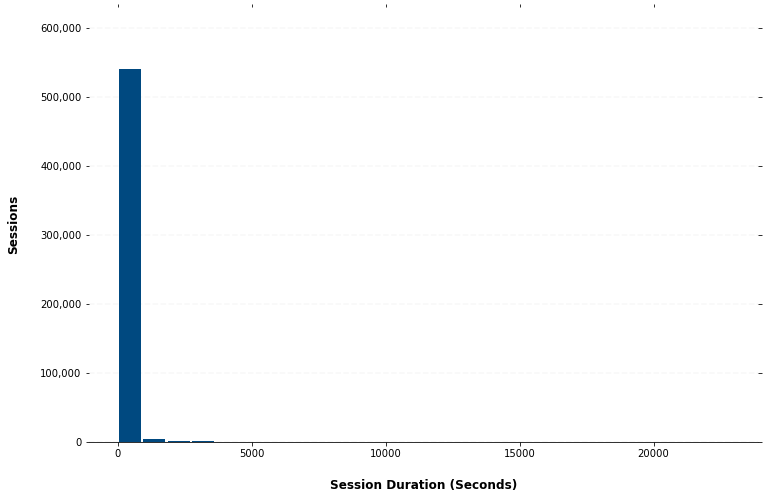

In [41]:
ax = dfn.hist(column='avg_session_duration', bins=25, grid=False, figsize=(12,8), color='#004980', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3EF024DC0>]],
      dtype=object)

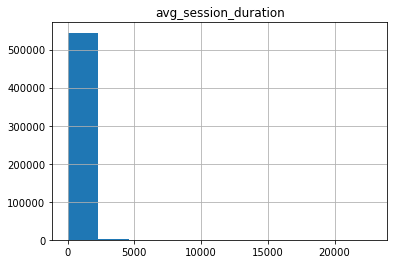

In [42]:
dfn.hist(column='avg_session_duration')

In [43]:
#log_freq_df = dfn('log(avg_session_duration)',
                                        #F.log(dfn['avg_session_duration']))
#log_freq_df.show()

#fig = dfn['avg_session_duration'].plot(kind="bar")
#plt.savefig("figure.png")

In [44]:
""""import seaborn as sns
c = sns.catplot(x='visitor_id_c', y='avg_session_duration',
                data=dfn,
                kind='point', height=5,
                aspect=6.5)"""

'"import seaborn as sns\nc = sns.catplot(x=\'visitor_id_c\', y=\'avg_session_duration\',\n                data=dfn,\n                kind=\'point\', height=5,\n                aspect=6.5)'

In [45]:
#x=dfn.groupby(['session_hk_c'])['session_hk_c'].count().fillna(0)
#y=dfn.groupby(['session_hk_c'])['session_duration'].sum().fillna(0)
 
#dfn['avgSession_duration']=(y/x).fillna(0)
#dfn.fillna(0)

In [46]:
#dfn['visitor_id_c'].duplicated(keep=False)
#dfn[dfn[['visitor_id_c']].duplicated() == False]

To list number of unique visitors for apps. 

In [47]:
dfnv=dfn.loc[dfn['user_returning'] == 0 ]
dfnv

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,avgtime,avg_session_duration
87,87,2020-09-26 13:48:19,170701,action-1,app-11,4,0,0,0,2020-09-26 13:48:19.000,2020-09-26 13:48:19.000,0,0,0,0.0,0.000000,0.0,2.0
88,88,2020-09-17 08:24:15,239772,action-1,app-61,5,0,2,1,2020-09-17 08:24:15.000,2020-09-17 08:24:16.000,0,0,0,0.0,0.500000,34.0,0.0
92,92,2020-09-02 23:59:28,232021,action-1,app-11,8,3,5,3,2020-09-02 23:59:25.000,2020-09-02 23:59:28.000,0,0,0,0.0,0.000000,0.0,0.0
153,153,2020-09-28 05:08:06,120354,action-1,app-49,10,0,1,0,2020-09-28 05:08:06.000,2020-09-28 05:08:06.000,0,0,0,0.0,1.000000,13.0,0.0
154,154,2020-09-22 11:19:16,73393,action-1,app-11,11,0,72,2,2020-09-22 11:19:16.000,2020-09-22 11:19:18.000,0,0,0,0.0,0.166667,1841.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594321,3594321,2020-09-22 11:14:37,326546,action-1,app-11,488020,0,2,1,2020-09-22 11:14:37.000,2020-09-22 11:14:38.000,0,0,0,0.0,0.000000,0.0,0.0
3594322,3594322,2020-09-20 13:30:51,195856,action-1,app-61,488021,0,31,10,2020-09-20 13:30:51.000,2020-09-20 13:31:01.000,0,0,0,0.0,0.000000,0.0,0.0
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.000000,0.0,0.0
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.000000,0.0,0.0


Total number of unique visitors for a specific app.

In [48]:

dfnv['VisitorCount'] = dfnv.groupby(['appname_c'])['visitor_id_c'].transform('count') 
dfnv

<ipython-input-48-dd8b1e37df46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnv['VisitorCount'] = dfnv.groupby(['appname_c'])['visitor_id_c'].transform('count')


,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,avgtime,avg_session_duration,VisitorCount
87,87,2020-09-26 13:48:19,170701,action-1,app-11,4,0,0,0,2020-09-26 13:48:19.000,2020-09-26 13:48:19.000,0,0,0,0.0,0.000000,0.0,2.0,51375
88,88,2020-09-17 08:24:15,239772,action-1,app-61,5,0,2,1,2020-09-17 08:24:15.000,2020-09-17 08:24:16.000,0,0,0,0.0,0.500000,34.0,0.0,63138
92,92,2020-09-02 23:59:28,232021,action-1,app-11,8,3,5,3,2020-09-02 23:59:25.000,2020-09-02 23:59:28.000,0,0,0,0.0,0.000000,0.0,0.0,51375
153,153,2020-09-28 05:08:06,120354,action-1,app-49,10,0,1,0,2020-09-28 05:08:06.000,2020-09-28 05:08:06.000,0,0,0,0.0,1.000000,13.0,0.0,1592
154,154,2020-09-22 11:19:16,73393,action-1,app-11,11,0,72,2,2020-09-22 11:19:16.000,2020-09-22 11:19:18.000,0,0,0,0.0,0.166667,1841.0,0.0,51375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594321,3594321,2020-09-22 11:14:37,326546,action-1,app-11,488020,0,2,1,2020-09-22 11:14:37.000,2020-09-22 11:14:38.000,0,0,0,0.0,0.000000,0.0,0.0,51375
3594322,3594322,2020-09-20 13:30:51,195856,action-1,app-61,488021,0,31,10,2020-09-20 13:30:51.000,2020-09-20 13:31:01.000,0,0,0,0.0,0.000000,0.0,0.0,63138
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.000000,0.0,0.0,63138
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.000000,0.0,0.0,51375


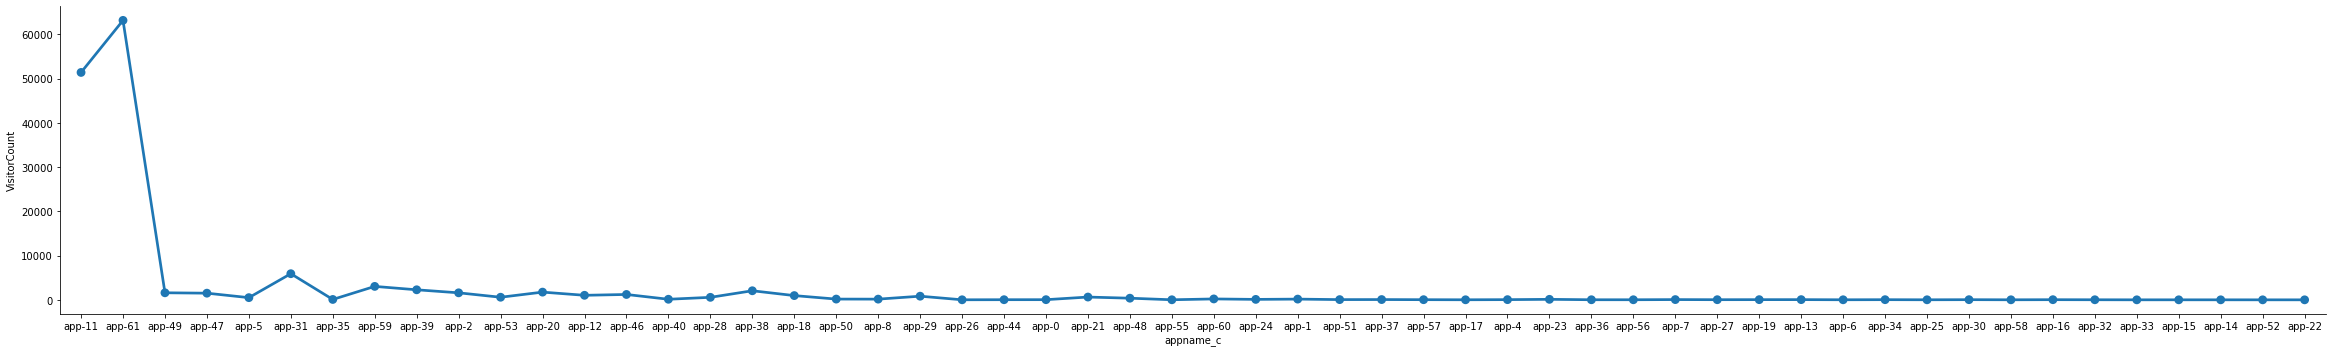

In [49]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='VisitorCount',
                data=dfnv,
                kind='point', height=5,
                aspect=6.5)

Pageviews count by visitor.

In [50]:
dfn['pageviews'] = dfn.groupby(['appname_c','visitor_id_c'])['appname_c'].transform('count')
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,avgtime,avg_session_duration,pageviews
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0,1.5,12.0,14492.00,5
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0,1.0,1912.0,1.00,1
79,79,2020-09-21 13:11:36,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,79,0,1,2.0,3.0,2.0,2.00,5
81,81,2020-09-23 13:27:55,4671,action-1,app-31,1,0,12,11,2020-09-23 13:27:55.000,2020-09-23 13:28:06.000,0,0,1,0.0,0.0,0.0,997.00,5
83,83,2020-09-02 05:45:37,342716,action-1,app-11,2,0,55,54,2020-09-02 05:45:37.000,2020-09-02 05:46:31.000,0,0,1,0.0,0.5,1301.0,677.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594328,3594328,2020-09-18 12:57:57,48524,action-1,app-38,488024,0,48,18,2020-09-18 12:57:57.000,2020-09-18 12:58:15.000,0,0,1,0.0,0.0,0.0,0.00,9
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0,0.0,0.00,1
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0,0.0,0.00,1
3594332,3594332,2020-09-06 20:32:57,192956,action-1,app-61,488027,0,3,2,2020-09-06 20:32:57.000,2020-09-06 20:32:59.000,0,0,0,0.0,0.0,0.0,0.00,1


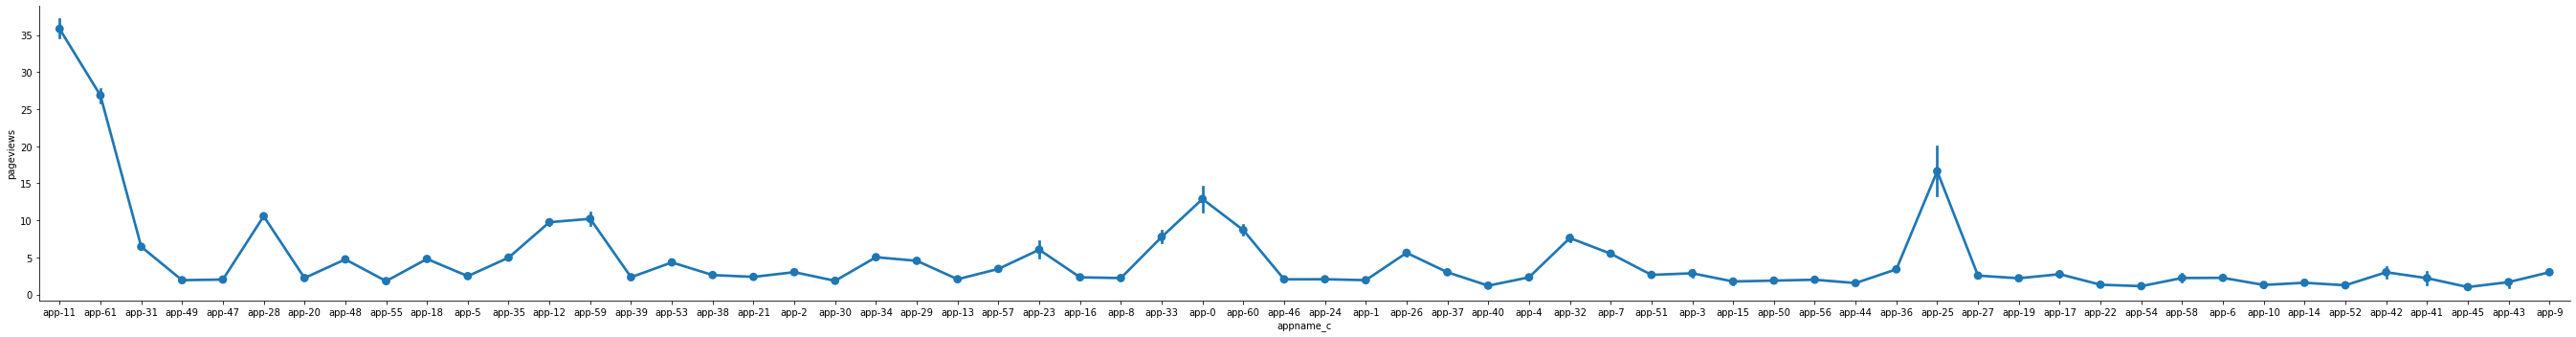

In [51]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='pageviews',
                data=dfn,
                kind='point', height=5,
                aspect=7.5)

In [62]:
""""bouncerate = (dfn.loc[dfn['pageviews'] == 1]
              .groupby('server_time')['session_hk_c'].count()
              .div(dfn.groupby('server_time')['session_hk_c']
                   .count())
              .to_frame('Bounce Rate'))"""

'"bouncerate = (dfn.loc[dfn[\'pageviews\'] == 1]\n              .groupby(\'server_time\')[\'session_hk_c\'].count()\n              .div(dfn.groupby(\'server_time\')[\'session_hk_c\']\n                   .count())\n              .to_frame(\'Bounce Rate\'))'

In [61]:
#bouncerate

In [59]:
""""bouncerate = (dfn.groupby('server_time')
              .apply(lambda x: sum(x.pageviews == 1) / x.pageviews.count())
              .to_frame('Bounce Rate'))"""

'"bouncerate = (dfn.groupby(\'server_time\')\n              .apply(lambda x: sum(x.pageviews == 1) / x.pageviews.count())\n              .to_frame(\'Bounce Rate\'))'

In [60]:
#bouncerate

In [57]:
bounceraten = (dfn.groupby('session_hk_c')
              .apply(lambda x: sum(x.pageviews == 1) / x.pageviews.count())
              .to_frame('Bounce Rate'))

In [58]:
bounceraten

,Bounce Rate
session_hk_c,
0,0.333333
1,0.000000
2,1.000000
3,0.000000
4,1.000000
...,...
488024,0.000000
488025,1.000000
488026,1.000000


In [65]:
#bounceraten.hist() 

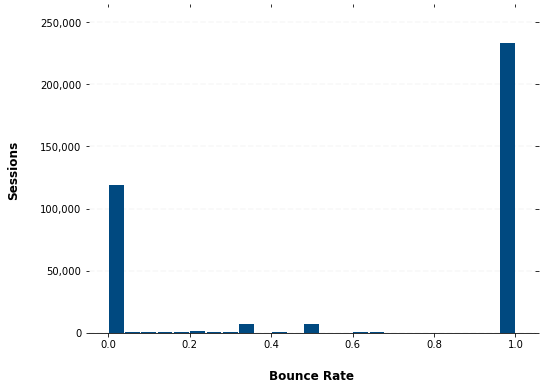

In [66]:
ax = bounceraten.hist( bins=25, grid=False, figsize=(8,6), color='#004980', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Bounce Rate", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
%matplotlib inline
bounceraten.plot.bar()

In [67]:
#Pages Per Session

In [72]:
 
dfn['pagespersession']=(dfn.groupby(['session_hk_c'])['pageviews'].count())/(dfn['session_hk_c'].count())
dfn=dfn.fillna(0)
dfn

,Unnamed: 0,server_time,visitor_id_c,event_action_c,appname_c,session_hk_c,time_spent_ref_action,visit_total_time,session_duration,visit_first_action_time,visit_last_action_time,step_session,user_logged,user_returning,elapsedtime,AvgAppused,avgtime,avg_session_duration,pageviews,pagespersession
0,0,2020-09-21 12:25:57,77997,action-1,app-11,0,2,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,0,0,1,0.0,1.5,12.0,14492.00,5,0.000005
78,78,2020-09-21 13:11:34,77997,action-1,app-61,0,0,0,0,2020-09-21 13:11:34.000,2020-09-21 13:11:34.000,78,0,1,24.0,1.0,1912.0,1.00,1,0.000002
79,79,2020-09-21 13:11:36,77997,action-1,app-11,0,10,21740,21738,2020-09-21 07:10:47.000,2020-09-21 13:13:05.000,79,0,1,2.0,3.0,2.0,2.00,5,0.000002
81,81,2020-09-23 13:27:55,4671,action-1,app-31,1,0,12,11,2020-09-23 13:27:55.000,2020-09-23 13:28:06.000,0,0,1,0.0,0.0,0.0,997.00,5,0.000002
83,83,2020-09-02 05:45:37,342716,action-1,app-11,2,0,55,54,2020-09-02 05:45:37.000,2020-09-02 05:46:31.000,0,0,1,0.0,0.5,1301.0,677.25,1,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594328,3594328,2020-09-18 12:57:57,48524,action-1,app-38,488024,0,48,18,2020-09-18 12:57:57.000,2020-09-18 12:58:15.000,0,0,1,0.0,0.0,0.0,0.00,9,0.000000
3594330,3594330,2020-09-29 08:21:26,92438,action-1,app-61,488025,0,1212,84,2020-09-29 08:21:26.000,2020-09-29 08:22:50.000,0,0,0,0.0,0.0,0.0,0.00,1,0.000000
3594331,3594331,2020-09-30 04:10:56,254192,action-1,app-11,488026,0,3,2,2020-09-30 04:10:56.000,2020-09-30 04:10:58.000,0,0,0,0.0,0.0,0.0,0.00,1,0.000000
3594332,3594332,2020-09-06 20:32:57,192956,action-1,app-61,488027,0,3,2,2020-09-06 20:32:57.000,2020-09-06 20:32:59.000,0,0,0,0.0,0.0,0.0,0.00,1,0.000000


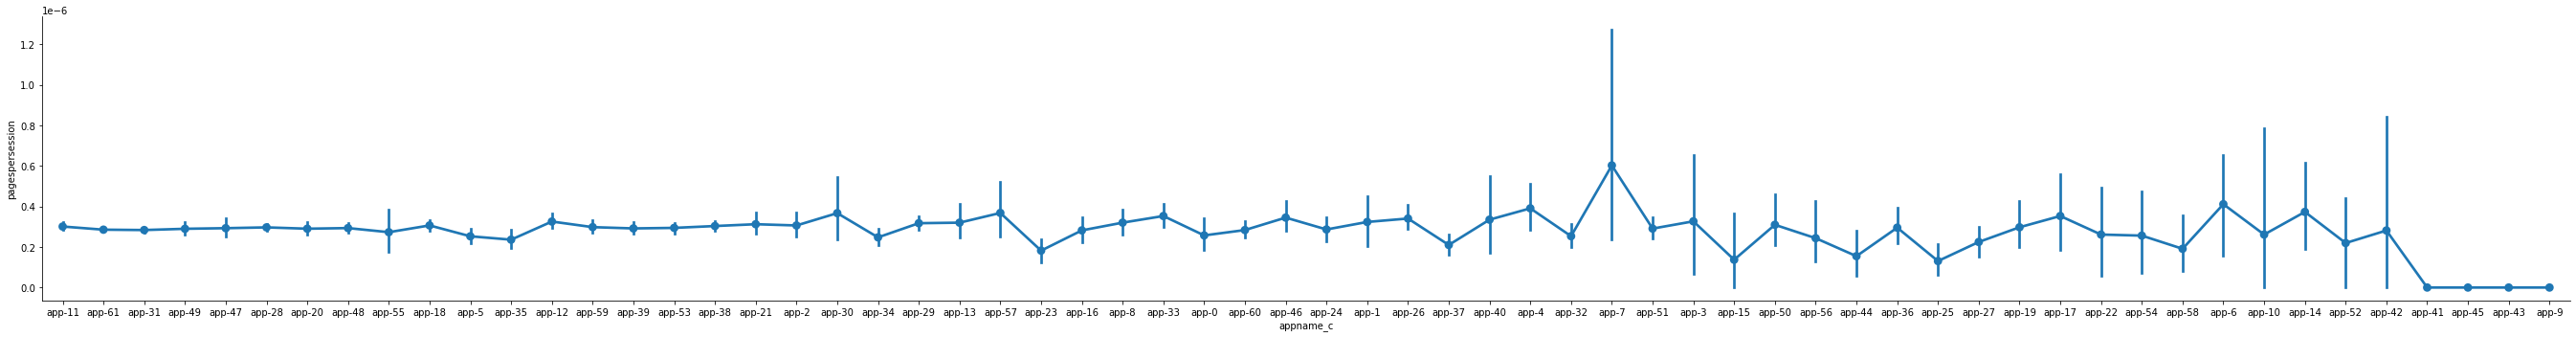

In [73]:
import seaborn as sns
c = sns.catplot(x='appname_c', y='pagespersession',
                data=dfn,
                kind='point', height=5,
                aspect=7.5)